# <span style="color:red"> Lezione 1 </span>

### <span style="color:black"> C++ code </span>

* 1.1\ 
Il codice è strutturato in classi: 
   - `experiment.h` nella quale sono inserite tutte le funzioni per analizzare i dati (ad esempio media blocchi);
   - per poter fruttare l'ereditarità delle classi "figlie" e la conseguente generalità, ho usato la classe `FunzBase.h`(così in `cicleblock_funz` posso usare "funzioni" generali);
   - ulteriori funzioni utili (scrittura, generazione rnd) sono contenute in `funzioni.h`. 

* 1.2

Si basa sulle stesse classi di 1.1, ma riadattate. Inoltre  le varie distribuzioni sono state implementate come classi figlie di `FunzBase.h`.

* 1.3

Si basa sulle stesse classi di 1.1, ma in `experiment.h` è stata implementata la funzione `cicleblock_buffon`, che compie il ciclo sui blocchi per il caso specifico di buffon.

Tutte e tre i programmi si compilano con il comando `make main.exe`.

## <span style="color:green"> Esercizio 1.1 </span>

### <span style="color:black">Python code </span>

Definisco funzioni per leggere i vari output del codice C++ e per poi plottarli.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
# funzione di lettura
def read(filename):
    x, sum_prog, err_prog = np.loadtxt("1.1/"+filename+".dat",\
            usecols=(0,1,2), delimiter=' ', unpack='true')
    return x, sum_prog, err_prog
# plot della media
def plot_mean(x,sump,errp):
    fig = plt.figure(figsize=(14,6))
    plt.errorbar(x,sump-0.5, color='blue',yerr=errp, ecolor='orange', label='mean block\'s value')
    plt.xlabel('#blocks')
    plt.ylabel('<r>-1/2')
    plt.title(f'Mean est: final value $r_L$={sump[-1]}')
    plt.grid(True)
    plt.legend()
    plt.show()
# plot della sigma
def plot_sigma(x,sump,errp):
    fig = plt.figure(figsize=(14,6))
    plt.errorbar(x, sump-1/12, color='blue', yerr=errp, ecolor='orange', label=f'$\sigma^2$ block\'s value')
    plt.xlabel('#block')
    plt.ylabel('<(r-0.5)^2>-1/12')
    plt.title(f'$\sigma^2$ est: final value $(\sigma^2)_L$={sump[-1]}')
    plt.grid(True)
    plt.legend()
    plt.show()
# plot chiquadro
def plot_chi():
    fig = plt.figure(figsize=(14,6))
    chiquadro = np.loadtxt("1.1/data_chiquadro.dat")         
    n_bins=17
    M=200 # number of chi's estimates
    mean = sum(chiquadro)/200
    plt.hist(chiquadro, n_bins, density=True, range=(140,260),label=['Chiquadro'])
    plt.xlabel(f'$\chi^2_k$ [k 1:{M}]')
    plt.ylabel(f'$\chi^2$')
    plt.title(f'Histogram of $\chi^2$"s estimates: mean value={mean}')
    plt.legend()
    plt.show()

* Andamento della media, $\sigma^2$ e $\chi^2$

I dati sono letti dagli output: media->`data.dat`; $\sigma^2$->`data_sigma.dat`; $\chi^2$->`data_chiquadro.dat`.

Per il primi due `.dat` abbiamo che la composizione è la stessa: 

1° colonna|2° colonna|3° colonna
----------|----------|----------
numero del blocco|valore media blk|sigma blk

Sono stati usati 100 blocchi da 10000 steps l'uno, per questi primi due output

Invece `data_chiquadro.dat` è composto da una solo colonna con i valori di $\chi^2$. In questo caso sono stati utlizzati 200 sotto intervalli identici di [0,1] con 10000 pseudo-random numbers l'uno.

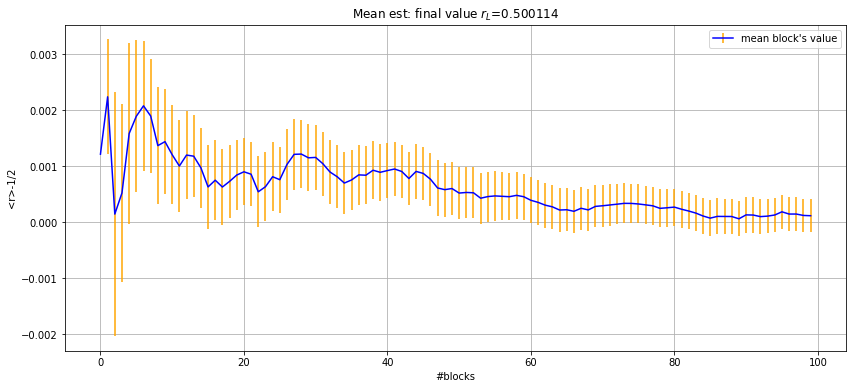

In [2]:
x , s , e = read("data")
plot_mean(x,s,e)

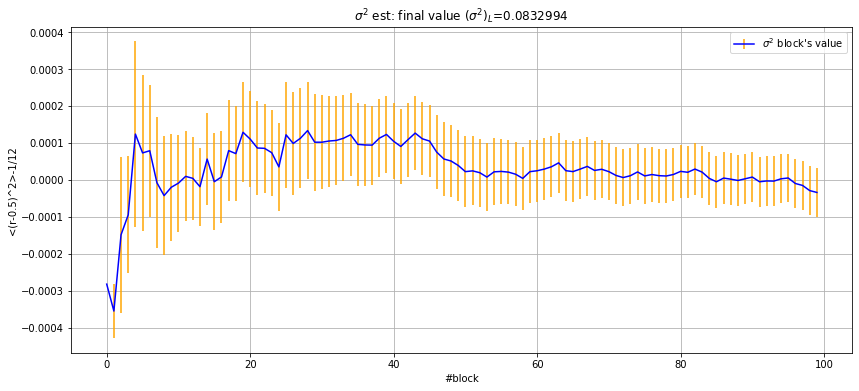

In [3]:
x, s, e = read("data_sigma")
plot_sigma(x,s,e)

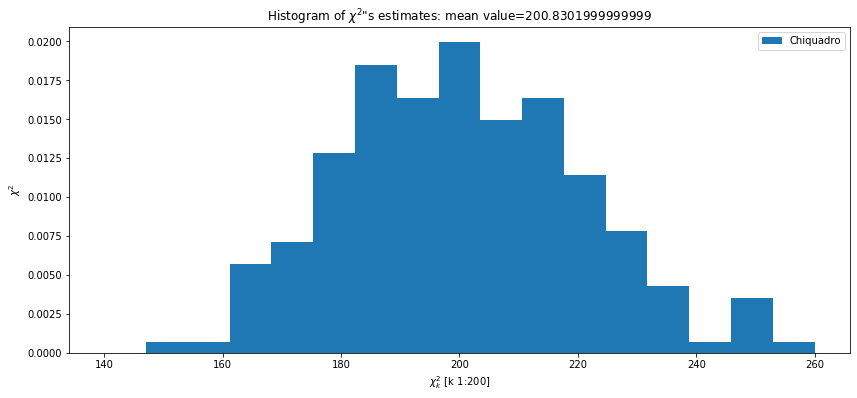

In [4]:
plot_chi()

Possiamo notare $\chi^2$ è piccato in 200 come ci si aspettava.

# <span style="color:green"> Esercizio 1.2 </span>

### <span style="color:black">Python code </span>

In questo caso non definisco una funzione in quanto sarebbe superfluo. Per i dati leggo dai file di output del codice C++: `data_unif.dat`, `data_exp.dat`, `data_lnz.dat`. I tre file sono tutti e tre composti allo stesso modo (N rappresenta il numero di elementi della distr nella media $S_N$ ):

1° colonna|2° colonna|3° colonna|4° colonna
----------|----------|----------|----------
blk con N=1|blk con N=2|blk con N=10|blk con N=100

Per tutte e tre le ditribuzioni ho usato $10^4$ stime della media.

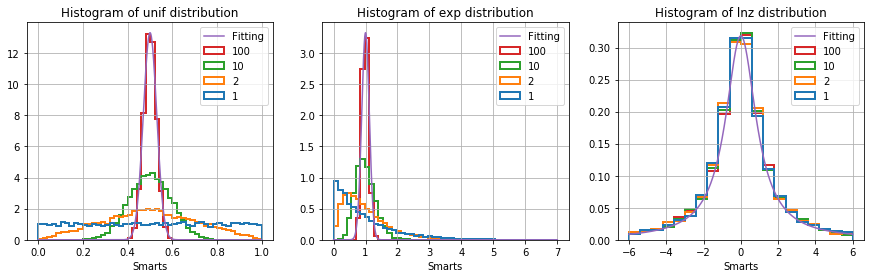

In [5]:
# Definisco i vari vettori da utilizzare nel for
distr = ["unif","exp","lnz"]
hist_range_sx = [0,0,-6]
hist_range_dx = [1,7,6]
sub_plot = [131,132,133]
bins_hist = [50,50,20]
mean = [0.5,1,0] # Dati per i fitting. Per quanto riguarda i dati delle gauss li ho ricavati per tentativi
standard_deviation = [0.03,0.12,1] # Gli ultimi dati dei due vettori sono in realtà mu e gamma, ma per comodità
                                   # li ho inseriti tutti negli stessi vettori
# Definisco le dimensioni del grafico
plt.figure(figsize=(15, 4))
# Il "for" per creare i tre grafici più il fitting sull'ultimo vettore v100
for i in range(3):
    v1,v2,v10,v100 = np.loadtxt(f"1.2/data_{distr[i]}.dat",\
                    usecols=(0,1,2,3), delimiter=' ', unpack='true')
    plt.subplot(+sub_plot[i])
    n, bins, patches = plt.hist([v1,v2,v10,v100], +bins_hist[i], histtype='step',\
                                linewidth='2', density=True, range=(+hist_range_sx[i],+hist_range_dx[i]),\
                                label=['1','2','10','100'])
    x_values = np.arange(+hist_range_sx[i], +hist_range_dx[i], 0.001)
    if i<2:
        y_values = stats.norm(+mean[i], +standard_deviation[i])
    else:
        y_values = stats.cauchy(+mean[i], +standard_deviation[i])
    plt.plot(x_values, y_values.pdf(x_values),label='Fitting')
    plt.xlabel('Smarts')
    plt.title(f'Histogram of {distr[i]} distribution')
    plt.legend()
    plt.grid(True)    
plt.show()

Possiamo vedere come le distribuzioni uniforme e esponenziale rispettino il teorema del limite centrale, mentre quella lorentziana no come ci si aspetta.
[Distr lnz](https://it.wikipedia.org/wiki/Distribuzione_di_Cauchy "Distr Cauchy")

# <span style="color:green"> Esercizio 1.3 </span>

### <span style="color:black">Python code </span>

Una stima di $\pi$ tramite l'esperimeto di buffon. Nel grafico si è mostrato $\pi$ in funzione del numero di blocchi, che in questo caso, sono 100 (ogni blocco è costituito da 10000 steps). La lunghezza dell'ago è stata impostata a $L=0.5$ con una distanza tra le righe $d=2$. Per i dati leggo l'output del codice C++ `data.dat` composto da: 

1° colonna|2° colonna|3° colonna
----------|----------|----------
numero blk|valore media blk|valore sigma blk

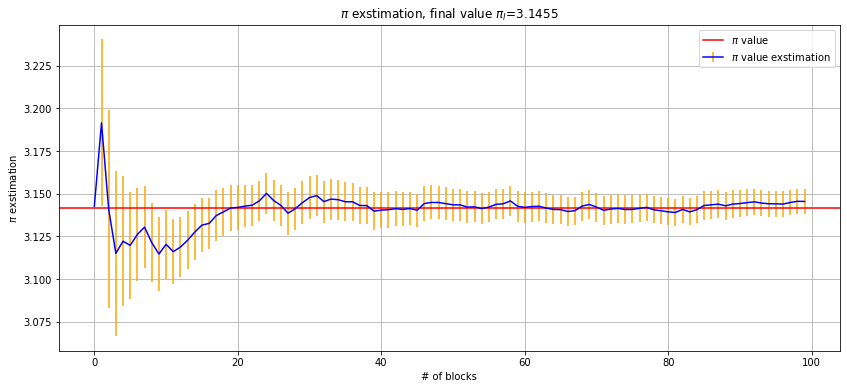

In [6]:
fig = plt.figure(figsize=(14,6))
x, sum_prog, err_prog = np.loadtxt("1.3/data.dat",\
                usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, sum_prog, color='blue', yerr=err_prog, ecolor='orange', label=f'$\pi$ value exstimation')
plt.axhline(y=math.pi, color='r', linestyle='-', label=f'$\pi$ value')
plt.xlabel('# of blocks')
plt.ylabel(f'$\pi$ exstimation')
plt.title(f'$\pi$ exstimation, final value $\pi_l$={sum_prog[-1]}')
plt.grid(True)
plt.legend()
plt.show()